- mnist를 DNN으로 구현 : https://sdc-james.gitbook.io/onebook/4.-and/5.1./5.1.3.-mnist-dataset
- 콜백함수

## 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 가져옴

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # mnist 데이터 셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input
from matplotlib import pyplot as plt # 학습과정 loss, acc 볼 때
np.random.seed(4)

In [2]:
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [3]:
print(data[0].shape)
print(data[0,0])
print(data[0,1:].reshape(28,28))

(785,)
5.0
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195. 

In [4]:
# # 비추
# np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [5]:
for row in data[0,1:].reshape(28,-1):
    for pixel in row:
        print('{:3.0f}'.format(pixel), end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

3.0

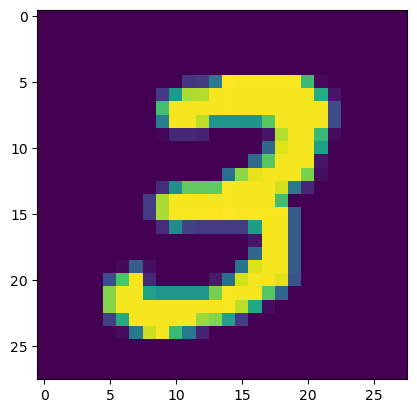

In [6]:
plt.imshow(data[7,1:].reshape(28,-1))
data[7,0]

## 위의 과정보다 더 많은 데이터를 라이브러리에서 가져옴

## 1. 데이터 생성& 전처리

In [7]:
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
for row in X_train[1]:
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

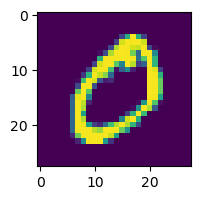

In [9]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[1])
plt.show()

In [10]:
Y_train[1]

0

In [11]:
# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

In [12]:
# 훈련셋,검증셋 => 학습시(fit에서) 사용, 시험셋(평가시 사용)
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [13]:
# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train=X_train.reshape(50000, 784).astype('float32')/255.0
X_val=X_val.reshape(-1, 784).astype('float32')/255.0
X_test=X_test.reshape(-1, 784).astype('float32')/255.0
X_train.shape, X_val.shape, X_test.shape

((50000, 784), (10000, 784), (10000, 784))

In [14]:
# 훈련셋(5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
train_idxs = np.random.choice(50000, 700)
val_idxs = np.random.choice(10000, 300)

X_train = X_train[train_idxs]
Y_train = Y_train[train_idxs]
X_val = X_val[val_idxs]
Y_val = Y_val[val_idxs]
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((700, 784), (700,), (300, 784), (300,))

9


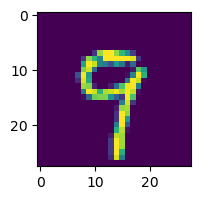

In [15]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[5].reshape(-1,28))
print(Y_train[5])
plt.show()

In [16]:
# 종속변수 전처리 : 원핫인코딩 (to_categorical pd.get_dummies(데이터프레임))
print('원핫인코딩 전 shape :',Y_train.shape, Y_val.shape, Y_test.shape)
# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)
print('원핫인코딩 후 shape:', Y_train.shape, Y_val.shape, Y_test.shape)

원핫인코딩 전 shape : (700,) (300,) (10000,)
원핫인코딩 후 shape: (700, 10) (300, 10) (10000, 10)


In [17]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [18]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## 2. 모델구성하기

In [19]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu')) # https://keras.io/api/layers/activations/
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


## 3. 모델 학습과정 설정

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

## 4. 모델 학습

In [21]:
hist = model.fit(X_train, Y_train, epochs=1200, batch_size=100,
                 validation_data=(X_val,Y_val))

Epoch 1/1200
7/7 [==============================] - 1s 42ms/step - loss: 2.3005 - accuracy: 0.0500 - val_loss: 2.2878 - val_accuracy: 0.0200
Epoch 2/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.2806 - accuracy: 0.0257 - val_loss: 2.2659 - val_accuracy: 0.0200
Epoch 3/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.2525 - accuracy: 0.0329 - val_loss: 2.2307 - val_accuracy: 0.0500
Epoch 4/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.2123 - accuracy: 0.0557 - val_loss: 2.1937 - val_accuracy: 0.0833
Epoch 5/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.1703 - accuracy: 0.0786 - val_loss: 2.1576 - val_accuracy: 0.0967
Epoch 6/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.1309 - accuracy: 0.1100 - val_loss: 2.1241 - val_accuracy: 0.1167
Epoch 7/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.0988 - accuracy: 0.1271 - val_loss: 2.0964 - val_accuracy: 0.1300
Epoch 8/1200
7/7 [=

7/7 [==============================] - 0s 7ms/step - loss: 1.5603 - accuracy: 0.3743 - val_loss: 1.6295 - val_accuracy: 0.3367
Epoch 60/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.5555 - accuracy: 0.3771 - val_loss: 1.6264 - val_accuracy: 0.3367
Epoch 61/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.5504 - accuracy: 0.3943 - val_loss: 1.6230 - val_accuracy: 0.3367
Epoch 62/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.5455 - accuracy: 0.3871 - val_loss: 1.6204 - val_accuracy: 0.3400
Epoch 63/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.5408 - accuracy: 0.3943 - val_loss: 1.6158 - val_accuracy: 0.3333
Epoch 64/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.5371 - accuracy: 0.3971 - val_loss: 1.6125 - val_accuracy: 0.3367
Epoch 65/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.5311 - accuracy: 0.3943 - val_loss: 1.6096 - val_accuracy: 0.3400
Epoch 66/1200
7/7 [========

7/7 [==============================] - 0s 8ms/step - loss: 1.3481 - accuracy: 0.4886 - val_loss: 1.5016 - val_accuracy: 0.4600
Epoch 118/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3457 - accuracy: 0.4971 - val_loss: 1.5003 - val_accuracy: 0.4633
Epoch 119/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.3441 - accuracy: 0.4971 - val_loss: 1.4986 - val_accuracy: 0.4567
Epoch 120/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.3400 - accuracy: 0.4971 - val_loss: 1.4969 - val_accuracy: 0.4567
Epoch 121/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3372 - accuracy: 0.4971 - val_loss: 1.4951 - val_accuracy: 0.4633
Epoch 122/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.3347 - accuracy: 0.5000 - val_loss: 1.4940 - val_accuracy: 0.4633
Epoch 123/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.3324 - accuracy: 0.5043 - val_loss: 1.4932 - val_accuracy: 0.4600
Epoch 124/1200
7/7 [=

Epoch 175/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.2039 - accuracy: 0.6114 - val_loss: 1.4204 - val_accuracy: 0.5233
Epoch 176/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.2017 - accuracy: 0.6157 - val_loss: 1.4199 - val_accuracy: 0.5200
Epoch 177/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.1991 - accuracy: 0.6157 - val_loss: 1.4191 - val_accuracy: 0.5233
Epoch 178/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.1971 - accuracy: 0.6157 - val_loss: 1.4185 - val_accuracy: 0.5200
Epoch 179/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.1946 - accuracy: 0.6157 - val_loss: 1.4166 - val_accuracy: 0.5233
Epoch 180/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.1920 - accuracy: 0.6271 - val_loss: 1.4148 - val_accuracy: 0.5300
Epoch 181/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.1899 - accuracy: 0.6229 - val_loss: 1.4139 - val_accuracy: 0.5267
Epoch 

Epoch 233/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.0797 - accuracy: 0.6814 - val_loss: 1.3587 - val_accuracy: 0.5300
Epoch 234/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.0780 - accuracy: 0.6771 - val_loss: 1.3563 - val_accuracy: 0.5400
Epoch 235/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.0765 - accuracy: 0.6814 - val_loss: 1.3570 - val_accuracy: 0.5300
Epoch 236/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.0748 - accuracy: 0.6829 - val_loss: 1.3559 - val_accuracy: 0.5300
Epoch 237/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.0726 - accuracy: 0.6814 - val_loss: 1.3547 - val_accuracy: 0.5333
Epoch 238/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.0707 - accuracy: 0.6800 - val_loss: 1.3548 - val_accuracy: 0.5333
Epoch 239/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.0696 - accuracy: 0.6829 - val_loss: 1.3551 - val_accuracy: 0.5267
Epoch 

Epoch 291/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.9861 - accuracy: 0.7086 - val_loss: 1.3340 - val_accuracy: 0.5300
Epoch 292/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.9842 - accuracy: 0.7114 - val_loss: 1.3353 - val_accuracy: 0.5267
Epoch 293/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.9836 - accuracy: 0.7129 - val_loss: 1.3345 - val_accuracy: 0.5333
Epoch 294/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.9818 - accuracy: 0.7114 - val_loss: 1.3345 - val_accuracy: 0.5333
Epoch 295/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9806 - accuracy: 0.7157 - val_loss: 1.3347 - val_accuracy: 0.5233
Epoch 296/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.9795 - accuracy: 0.7071 - val_loss: 1.3345 - val_accuracy: 0.5233
Epoch 297/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9781 - accuracy: 0.7100 - val_loss: 1.3335 - val_accuracy: 0.5300
Epoch 

Epoch 349/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9151 - accuracy: 0.7386 - val_loss: 1.3433 - val_accuracy: 0.5333
Epoch 350/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9145 - accuracy: 0.7386 - val_loss: 1.3430 - val_accuracy: 0.5400
Epoch 351/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.9136 - accuracy: 0.7357 - val_loss: 1.3417 - val_accuracy: 0.5300
Epoch 352/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9119 - accuracy: 0.7386 - val_loss: 1.3408 - val_accuracy: 0.5333
Epoch 353/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.9108 - accuracy: 0.7429 - val_loss: 1.3420 - val_accuracy: 0.5267
Epoch 354/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.9098 - accuracy: 0.7429 - val_loss: 1.3416 - val_accuracy: 0.5300
Epoch 355/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.9093 - accuracy: 0.7400 - val_loss: 1.3427 - val_accuracy: 0.5267
Epoch 

Epoch 407/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8575 - accuracy: 0.7557 - val_loss: 1.3681 - val_accuracy: 0.5300
Epoch 408/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8570 - accuracy: 0.7500 - val_loss: 1.3686 - val_accuracy: 0.5367
Epoch 409/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.8554 - accuracy: 0.7529 - val_loss: 1.3691 - val_accuracy: 0.5300
Epoch 410/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.8547 - accuracy: 0.7486 - val_loss: 1.3702 - val_accuracy: 0.5367
Epoch 411/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8536 - accuracy: 0.7514 - val_loss: 1.3690 - val_accuracy: 0.5333
Epoch 412/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8526 - accuracy: 0.7529 - val_loss: 1.3705 - val_accuracy: 0.5333
Epoch 413/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8525 - accuracy: 0.7486 - val_loss: 1.3698 - val_accuracy: 0.5333
Epoch 

Epoch 465/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8072 - accuracy: 0.7671 - val_loss: 1.4070 - val_accuracy: 0.5300
Epoch 466/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.8067 - accuracy: 0.7671 - val_loss: 1.4079 - val_accuracy: 0.5300
Epoch 467/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8053 - accuracy: 0.7671 - val_loss: 1.4089 - val_accuracy: 0.5300
Epoch 468/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.8049 - accuracy: 0.7729 - val_loss: 1.4091 - val_accuracy: 0.5300
Epoch 469/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8042 - accuracy: 0.7671 - val_loss: 1.4086 - val_accuracy: 0.5300
Epoch 470/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8036 - accuracy: 0.7643 - val_loss: 1.4113 - val_accuracy: 0.5300
Epoch 471/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8020 - accuracy: 0.7700 - val_loss: 1.4137 - val_accuracy: 0.5267
Epoch 

7/7 [==============================] - 0s 7ms/step - loss: 0.7627 - accuracy: 0.7800 - val_loss: 1.4484 - val_accuracy: 0.5200
Epoch 523/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7617 - accuracy: 0.7814 - val_loss: 1.4512 - val_accuracy: 0.5167
Epoch 524/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7614 - accuracy: 0.7814 - val_loss: 1.4508 - val_accuracy: 0.5200
Epoch 525/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7605 - accuracy: 0.7829 - val_loss: 1.4514 - val_accuracy: 0.5333
Epoch 526/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7597 - accuracy: 0.7800 - val_loss: 1.4520 - val_accuracy: 0.5267
Epoch 527/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7593 - accuracy: 0.7786 - val_loss: 1.4519 - val_accuracy: 0.5267
Epoch 528/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7588 - accuracy: 0.7843 - val_loss: 1.4535 - val_accuracy: 0.5267
Epoch 529/1200
7/7 [=

Epoch 580/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7224 - accuracy: 0.7943 - val_loss: 1.5126 - val_accuracy: 0.5133
Epoch 581/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7219 - accuracy: 0.7971 - val_loss: 1.5133 - val_accuracy: 0.5133
Epoch 582/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.7205 - accuracy: 0.7929 - val_loss: 1.5140 - val_accuracy: 0.5133
Epoch 583/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.7202 - accuracy: 0.7957 - val_loss: 1.5166 - val_accuracy: 0.5100
Epoch 584/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.7187 - accuracy: 0.8000 - val_loss: 1.5184 - val_accuracy: 0.5167
Epoch 585/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.7191 - accuracy: 0.7943 - val_loss: 1.5168 - val_accuracy: 0.5167
Epoch 586/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7178 - accuracy: 0.7914 - val_loss: 1.5190 - val_accuracy: 0.5100
Epoch 

Epoch 638/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6810 - accuracy: 0.8100 - val_loss: 1.5882 - val_accuracy: 0.5167
Epoch 639/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6805 - accuracy: 0.8114 - val_loss: 1.5892 - val_accuracy: 0.5133
Epoch 640/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6797 - accuracy: 0.8129 - val_loss: 1.5911 - val_accuracy: 0.5133
Epoch 641/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6788 - accuracy: 0.8086 - val_loss: 1.5942 - val_accuracy: 0.5167
Epoch 642/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6787 - accuracy: 0.8100 - val_loss: 1.5941 - val_accuracy: 0.5100
Epoch 643/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6777 - accuracy: 0.8129 - val_loss: 1.5967 - val_accuracy: 0.5133
Epoch 644/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6773 - accuracy: 0.8129 - val_loss: 1.5967 - val_accuracy: 0.5133
Epoch 

Epoch 696/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6467 - accuracy: 0.8186 - val_loss: 1.6639 - val_accuracy: 0.5100
Epoch 697/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6464 - accuracy: 0.8143 - val_loss: 1.6661 - val_accuracy: 0.5100
Epoch 698/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.6453 - accuracy: 0.8186 - val_loss: 1.6703 - val_accuracy: 0.5100
Epoch 699/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6448 - accuracy: 0.8214 - val_loss: 1.6719 - val_accuracy: 0.5100
Epoch 700/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6445 - accuracy: 0.8186 - val_loss: 1.6700 - val_accuracy: 0.5100
Epoch 701/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6437 - accuracy: 0.8171 - val_loss: 1.6723 - val_accuracy: 0.5100
Epoch 702/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6436 - accuracy: 0.8229 - val_loss: 1.6728 - val_accuracy: 0.5100
Epoch

Epoch 754/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6173 - accuracy: 0.8243 - val_loss: 1.7424 - val_accuracy: 0.4967
Epoch 755/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6169 - accuracy: 0.8243 - val_loss: 1.7421 - val_accuracy: 0.5033
Epoch 756/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6160 - accuracy: 0.8229 - val_loss: 1.7456 - val_accuracy: 0.5033
Epoch 757/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6149 - accuracy: 0.8229 - val_loss: 1.7479 - val_accuracy: 0.5033
Epoch 758/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6143 - accuracy: 0.8229 - val_loss: 1.7525 - val_accuracy: 0.5000
Epoch 759/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6141 - accuracy: 0.8200 - val_loss: 1.7547 - val_accuracy: 0.5033
Epoch 760/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6138 - accuracy: 0.8243 - val_loss: 1.7565 - val_accuracy: 0.5033
Epoch 

Epoch 812/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5891 - accuracy: 0.8286 - val_loss: 1.8332 - val_accuracy: 0.5000
Epoch 813/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5882 - accuracy: 0.8300 - val_loss: 1.8301 - val_accuracy: 0.4900
Epoch 814/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5877 - accuracy: 0.8271 - val_loss: 1.8337 - val_accuracy: 0.4900
Epoch 815/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5873 - accuracy: 0.8243 - val_loss: 1.8356 - val_accuracy: 0.4900
Epoch 816/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5873 - accuracy: 0.8314 - val_loss: 1.8353 - val_accuracy: 0.4933
Epoch 817/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5866 - accuracy: 0.8286 - val_loss: 1.8364 - val_accuracy: 0.4900
Epoch 818/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5861 - accuracy: 0.8314 - val_loss: 1.8392 - val_accuracy: 0.4967
Epoch 

Epoch 870/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5635 - accuracy: 0.8414 - val_loss: 1.9247 - val_accuracy: 0.4933
Epoch 871/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5640 - accuracy: 0.8343 - val_loss: 1.9234 - val_accuracy: 0.4900
Epoch 872/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5625 - accuracy: 0.8386 - val_loss: 1.9281 - val_accuracy: 0.4900
Epoch 873/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5625 - accuracy: 0.8386 - val_loss: 1.9291 - val_accuracy: 0.4933
Epoch 874/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5617 - accuracy: 0.8400 - val_loss: 1.9282 - val_accuracy: 0.4900
Epoch 875/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5618 - accuracy: 0.8386 - val_loss: 1.9337 - val_accuracy: 0.4933
Epoch 876/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5612 - accuracy: 0.8371 - val_loss: 1.9314 - val_accuracy: 0.4900
Epoch 

Epoch 928/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5412 - accuracy: 0.8443 - val_loss: 2.0079 - val_accuracy: 0.4833
Epoch 929/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5404 - accuracy: 0.8500 - val_loss: 2.0158 - val_accuracy: 0.4833
Epoch 930/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.5403 - accuracy: 0.8514 - val_loss: 2.0115 - val_accuracy: 0.4800
Epoch 931/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5401 - accuracy: 0.8471 - val_loss: 2.0156 - val_accuracy: 0.4833
Epoch 932/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5396 - accuracy: 0.8486 - val_loss: 2.0182 - val_accuracy: 0.4833
Epoch 933/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5389 - accuracy: 0.8500 - val_loss: 2.0175 - val_accuracy: 0.4833
Epoch 934/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5396 - accuracy: 0.8471 - val_loss: 2.0123 - val_accuracy: 0.4833
Epoch 

7/7 [==============================] - 0s 8ms/step - loss: 0.5206 - accuracy: 0.8543 - val_loss: 2.1027 - val_accuracy: 0.4900
Epoch 986/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5203 - accuracy: 0.8543 - val_loss: 2.0995 - val_accuracy: 0.4933
Epoch 987/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5199 - accuracy: 0.8543 - val_loss: 2.1007 - val_accuracy: 0.4900
Epoch 988/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5207 - accuracy: 0.8543 - val_loss: 2.0984 - val_accuracy: 0.4900
Epoch 989/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5198 - accuracy: 0.8543 - val_loss: 2.1089 - val_accuracy: 0.4900
Epoch 990/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5189 - accuracy: 0.8557 - val_loss: 2.0935 - val_accuracy: 0.4867
Epoch 991/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5195 - accuracy: 0.8514 - val_loss: 2.0988 - val_accuracy: 0.4867
Epoch 992/1200
7/7 [=

7/7 [==============================] - 0s 8ms/step - loss: 0.5015 - accuracy: 0.8586 - val_loss: 2.1904 - val_accuracy: 0.4900
Epoch 1043/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5022 - accuracy: 0.8600 - val_loss: 2.1937 - val_accuracy: 0.4900
Epoch 1044/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.5014 - accuracy: 0.8586 - val_loss: 2.1956 - val_accuracy: 0.4833
Epoch 1045/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.5009 - accuracy: 0.8586 - val_loss: 2.1857 - val_accuracy: 0.4900
Epoch 1046/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.5007 - accuracy: 0.8614 - val_loss: 2.1915 - val_accuracy: 0.4900
Epoch 1047/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.5001 - accuracy: 0.8614 - val_loss: 2.1927 - val_accuracy: 0.4867
Epoch 1048/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.5003 - accuracy: 0.8586 - val_loss: 2.1993 - val_accuracy: 0.4900
Epoch 1049/1200

7/7 [==============================] - 0s 7ms/step - loss: 0.4836 - accuracy: 0.8629 - val_loss: 2.2856 - val_accuracy: 0.4967
Epoch 1100/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.4831 - accuracy: 0.8643 - val_loss: 2.2924 - val_accuracy: 0.4933
Epoch 1101/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.4829 - accuracy: 0.8629 - val_loss: 2.2862 - val_accuracy: 0.4967
Epoch 1102/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4829 - accuracy: 0.8629 - val_loss: 2.2872 - val_accuracy: 0.4933
Epoch 1103/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.4821 - accuracy: 0.8657 - val_loss: 2.2883 - val_accuracy: 0.4967
Epoch 1104/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4821 - accuracy: 0.8657 - val_loss: 2.2914 - val_accuracy: 0.4900
Epoch 1105/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.4816 - accuracy: 0.8643 - val_loss: 2.2931 - val_accuracy: 0.4933
Epoch 1106/1200

7/7 [==============================] - 0s 7ms/step - loss: 0.4668 - accuracy: 0.8700 - val_loss: 2.3793 - val_accuracy: 0.4933
Epoch 1157/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4664 - accuracy: 0.8700 - val_loss: 2.3822 - val_accuracy: 0.4933
Epoch 1158/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4660 - accuracy: 0.8686 - val_loss: 2.3762 - val_accuracy: 0.4933
Epoch 1159/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4656 - accuracy: 0.8671 - val_loss: 2.3851 - val_accuracy: 0.4967
Epoch 1160/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.4653 - accuracy: 0.8700 - val_loss: 2.3932 - val_accuracy: 0.4967
Epoch 1161/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4656 - accuracy: 0.8714 - val_loss: 2.3913 - val_accuracy: 0.4933
Epoch 1162/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4649 - accuracy: 0.8686 - val_loss: 2.3885 - val_accuracy: 0.4967
Epoch 1163/1200

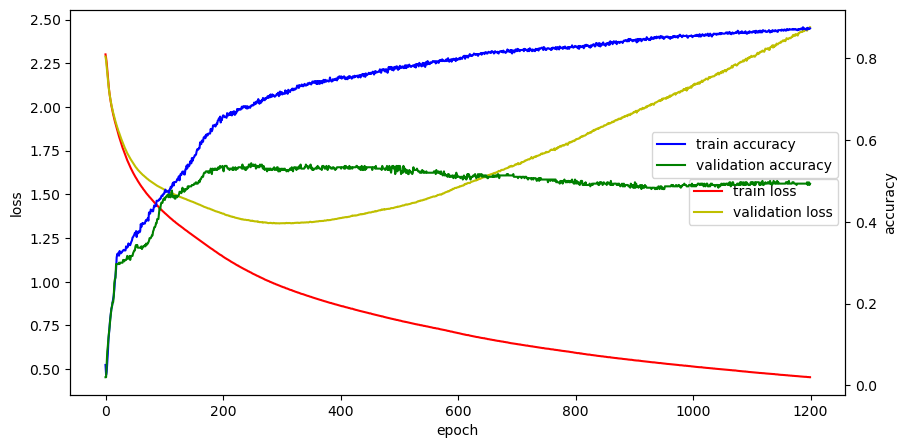

In [22]:
# 학습과정 표시하기(validation dataset 있는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

## ※ 콜백함수1

In [23]:
# 너무 자주 로그를 출력하면 지저분해질 수 있으니, 특정 에코크 간격마다 로그를 출력하도록 제한
import tensorflow.keras.callbacks as callbacks
class CustomHistory(callbacks.Callback): # on_epoch_end()는 각 에포크 종료시 자동 호출
    def __init__(self): # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch%50 == 0:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.\
                 format(self.epoch,
                        logs.get('loss'),
                        logs.get('accuracy'),
                        logs.get('val_loss'),
                        logs.get('val_accuracy')
                       ))

In [32]:
#1 데이터셋 준비하기
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train=X_train.reshape(50000, 784).astype('float32')/255.0
X_val=X_val.reshape(-1, 784).astype('float32')/255.0
X_test=X_test.reshape(-1, 784).astype('float32')/255.0

# 훈련셋(5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
train_idxs = np.random.choice(50000, 700)
val_idxs = np.random.choice(10000, 300)

X_train = X_train[train_idxs]
Y_train = Y_train[train_idxs]
X_val = X_val[val_idxs]
Y_val = Y_val[val_idxs]

# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

# 2. 모델 구성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu')) # https://keras.io/api/layers/activations/
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# 4. 모델 학습(콜백 적용)
customHistory = CustomHistory()
hist = model.fit(X_train, Y_train, epochs=1200, batch_size=100,
                 validation_data=(X_val,Y_val),
                 verbose=0,
                 callbacks=[customHistory])

epoch:50, loss:0.0003137328021693975, acc:1.0, val_loss:0.30442389845848083, val_acc:0.9300000071525574
epoch:100, loss:6.338077946566045e-05, acc:1.0, val_loss:0.3343476951122284, val_acc:0.9266666769981384
epoch:150, loss:2.5426827050978318e-05, acc:1.0, val_loss:0.3544485867023468, val_acc:0.9233333468437195
epoch:200, loss:1.3250756637717132e-05, acc:1.0, val_loss:0.3715456426143646, val_acc:0.9200000166893005
epoch:250, loss:7.947374797367956e-06, acc:1.0, val_loss:0.3866647779941559, val_acc:0.9200000166893005
epoch:300, loss:5.126114047016017e-06, acc:1.0, val_loss:0.39850905537605286, val_acc:0.9233333468437195
epoch:350, loss:3.519543270158465e-06, acc:1.0, val_loss:0.4097072184085846, val_acc:0.9233333468437195
epoch:400, loss:2.5117260520346463e-06, acc:1.0, val_loss:0.41928809881210327, val_acc:0.9200000166893005
epoch:450, loss:1.8463742890162393e-06, acc:1.0, val_loss:0.428257554769516, val_acc:0.9200000166893005
epoch:500, loss:1.3809504935125005e-06, acc:1.0, val_loss:0

KeyboardInterrupt: 

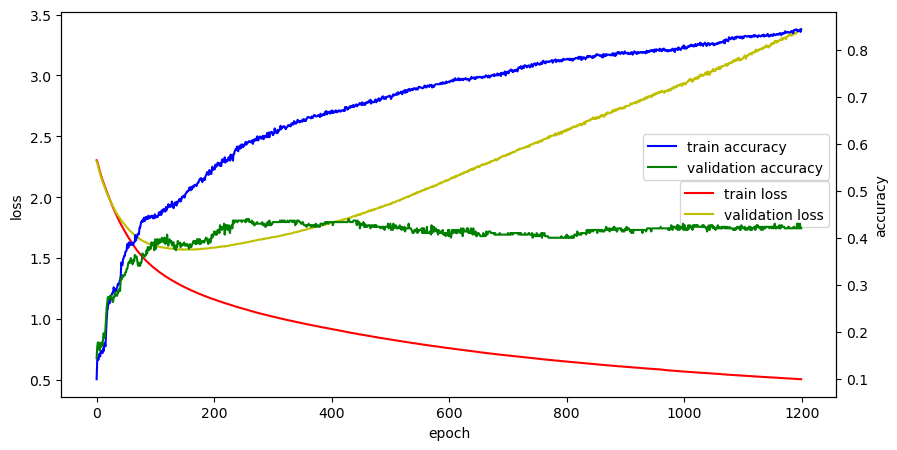

In [25]:
# 학습과정 표시하기(validation dataset 있는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

## ※ 콜백함수2 - Early Stopping(조기 종료)
- val_loss값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료

In [39]:
#1 데이터셋 준비하기
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train=X_train.reshape(50000, 784).astype('float32')/255.0
X_val=X_val.reshape(-1, 784).astype('float32')/255.0
X_test=X_test.reshape(-1, 784).astype('float32')/255.0

# 훈련셋(5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
# train_idxs = np.random.choice(50000, 700)
# val_idxs = np.random.choice(10000, 300)

# X_train = X_train[train_idxs]
# Y_train = Y_train[train_idxs]
# X_val = X_val[val_idxs]
# Y_val = Y_val[val_idxs]

# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

# 2. 모델 구성
model = Sequential()
model.add(Input(shape=(784,)))

model.add(Dense(units=2, activation='relu')) # https://keras.io/api/layers/activations/
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# 4. 모델 학습(콜백 적용)
from tensorflow.keras.callbacks import EarlyStopping
# earlyStopping = EarlyStopping(patience=2) # val_loss가 연달아 2번 이상 성능이 좋아지지 않으면 stop
# earlyStopping = EarlyStopping(patience=2, 
#                               monitor='val_accuracy' # loss, accuracy, val_loss(기본값), val_accuracy
#                              ) # 성급한 조기종료
earlyStopping = EarlyStopping(patience=10)

hist = model.fit(X_train, Y_train, epochs=100, batch_size=100,
                 validation_data=(X_val,Y_val),
                 callbacks=[earlyStopping]
                )

Epoch 1/100
500/500 [==============================] - 2s 3ms/step - loss: 1.8042 - accuracy: 0.3230 - val_loss: 1.5482 - val_accuracy: 0.4408
Epoch 2/100
500/500 [==============================] - 1s 2ms/step - loss: 1.4436 - accuracy: 0.4756 - val_loss: 1.3259 - val_accuracy: 0.5056
Epoch 3/100
500/500 [==============================] - 1s 2ms/step - loss: 1.2805 - accuracy: 0.5260 - val_loss: 1.2104 - val_accuracy: 0.5471
Epoch 4/100
500/500 [==============================] - 1s 2ms/step - loss: 1.1973 - accuracy: 0.5547 - val_loss: 1.1464 - val_accuracy: 0.5679
Epoch 5/100
500/500 [==============================] - 1s 2ms/step - loss: 1.1452 - accuracy: 0.5840 - val_loss: 1.1007 - val_accuracy: 0.6007
Epoch 6/100
500/500 [==============================] - 1s 2ms/step - loss: 1.1054 - accuracy: 0.6105 - val_loss: 1.0654 - val_accuracy: 0.6395
Epoch 7/100
500/500 [==============================] - 1s 2ms/step - loss: 1.0744 - accuracy: 0.6308 - val_loss: 1.0364 - val_accuracy: 0.6519

Epoch 58/100
500/500 [==============================] - 1s 2ms/step - loss: 0.9073 - accuracy: 0.6958 - val_loss: 0.8800 - val_accuracy: 0.7061
Epoch 59/100
500/500 [==============================] - 1s 2ms/step - loss: 0.9066 - accuracy: 0.6963 - val_loss: 0.8788 - val_accuracy: 0.7031
Epoch 60/100
500/500 [==============================] - 1s 2ms/step - loss: 0.9062 - accuracy: 0.6954 - val_loss: 0.8793 - val_accuracy: 0.7054
Epoch 61/100
500/500 [==============================] - 1s 2ms/step - loss: 0.9061 - accuracy: 0.6940 - val_loss: 0.8790 - val_accuracy: 0.7033
Epoch 62/100
500/500 [==============================] - 1s 2ms/step - loss: 0.9052 - accuracy: 0.6976 - val_loss: 0.8813 - val_accuracy: 0.6997
Epoch 63/100
500/500 [==============================] - 1s 2ms/step - loss: 0.9055 - accuracy: 0.6959 - val_loss: 0.8820 - val_accuracy: 0.6992
Epoch 64/100
500/500 [==============================] - 1s 2ms/step - loss: 0.9050 - accuracy: 0.6960 - val_loss: 0.8797 - val_accuracy:

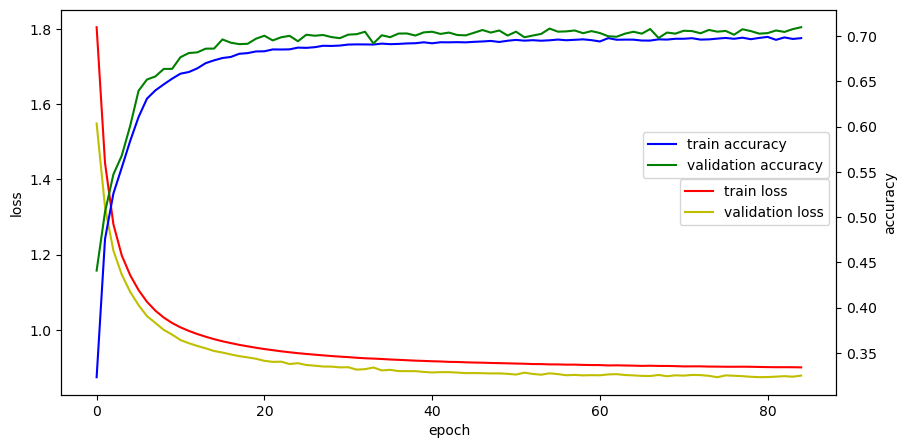

In [40]:
# 학습과정 표시하기(validation dataset 있는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

위 모델(DNN)의 accuracy 늘리기
- 데이터 확보
- 레이어
- 활성화 함수 : 은닉층에 주로 relu계열
- optimizer, epoch 등을 조정

In [45]:
# 너무 자주 로그를 출력하면 지저분해질 수 있으니, 특정 에코크 간격마다 로그를 출력하도록 제한
import tensorflow.keras.callbacks as callbacks
class CustomHistory(callbacks.Callback): # on_epoch_end()는 각 에포크 종료시 자동 호출
    def __init__(self): # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch% 5 == 0:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.\
                 format(self.epoch,
                        logs.get('loss'),
                       logs.get('accuracy'),
                       logs.get('val_loss'),
                       logs.get('val_accuracy')))

#1 데이터셋 준비하기
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train=X_train.reshape(50000, 784).astype('float32')/255.0
X_val=X_val.reshape(-1, 784).astype('float32')/255.0
X_test=X_test.reshape(-1, 784).astype('float32')/255.0

# # 훈련셋(5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
# train_idxs = np.random.choice(50000, 700)
# val_idxs = np.random.choice(10000, 300)
# X_train = X_train[train_idxs]
# Y_train = Y_train[train_idxs]
# X_val = X_val[val_idxs]
# Y_val = Y_val[val_idxs]

# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

# 2. 모델 구성
model = Sequential()
model.add(Input(shape=(784,)))
# model.add(Dense(units=512,
#                activation='relu'))
model.add(Dense(units=32,
               activation='relu'))
model.add(Dense(units=16,
               activation='relu'))
model.add(Dense(units=10,
               activation='softmax'))
print(model.summary())

# 3. 학습 설정
model.compile(loss='categorical_crossentropy',
             optimizer='nadam',
             metrics=['accuracy'])
# 4. 모델 학습(콜백 적용)
from tensorflow.keras.callbacks import EarlyStopping
# earlyStopping = EarlyStopping(patience=30,# val_loss가 연달아 2번 이상 성능이 좋아지지 않으면 stop
#                              monitor='val_accuracy') # val_accuracy 가 연달아 2번이상 성능이 좋아지지 않으면 stop
#                                                      # Loss, accuracy, val_loss(기본값), val_accuracy
earlyStopping = EarlyStopping(patience=10)
customHistory = CustomHistory()
hist = model.fit(X_train, Y_train,
                epochs=100,
                batch_size=100,
                validation_data=(X_val, Y_val),
                callbacks=[earlyStopping, customHistory],
                verbose=0)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 32)                25120     
                                                                 
 dense_41 (Dense)            (None, 16)                528       
                                                                 
 dense_42 (Dense)            (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________
None
epoch:5, loss:0.15135422348976135, acc:0.9552800059318542, val_loss:0.1491110473871231, val_acc:0.9595000147819519
epoch:10, loss:0.09829266369342804, acc:0.971340000629425, val_loss:0.1324443817138672, val_acc:0.9624000191688538
epoch:15, loss:0.07300596684217453, acc:0.9777600169181824, val_loss:0.1350861

## 5. 모델 평가(그래프, 평가함수)

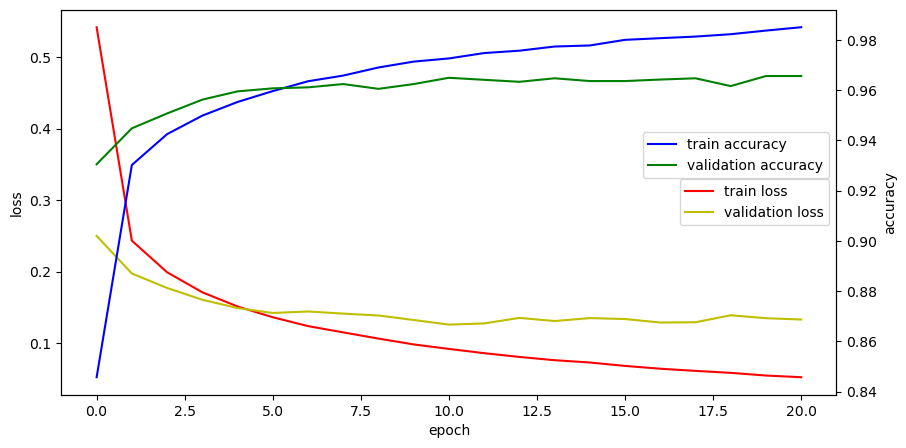

In [46]:
# 학습과정 표시하기(validation dataset 있는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [47]:
# 모델 평가
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=100)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

100/100 [==============================] - 0s 2ms/step - loss: 0.1305 - accuracy: 0.9639
loss : 0.13052453100681305
accuracy : 0.9639000296592712


## 6. 모델 저장
- 1. 학습된 모델 저장 : h5파일 (모델 로드시 추가 학습이 필요x)
- 2. 모델 구성만 저장 : json파일 (모델 로드시 추가 학습이 필요 o)

In [48]:
# 학습된 모델 저장
model.save('model/mnist.h5')

In [49]:
# 학습된 모델 로드하기
from tensorflow.keras.models import load_model
model2 = load_model('model/mnist.h5')
model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 32)                25120     
                                                                 
 dense_41 (Dense)            (None, 16)                528       
                                                                 
 dense_42 (Dense)            (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [50]:
model2.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1305 - accuracy: 0.9639


[0.13052453100681305, 0.9639000296592712]

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1


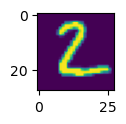

In [64]:
plt.figure(figsize=(1,1))
plt.imshow(X_test[1].reshape(28,28))
print(Y_test[2])
print(Y_test[2].argmax())
plt.show()

In [52]:
# 모델 사용하기
X_test[0].shape

(784,)

In [60]:
result = model2.predict(X_test[0].reshape(1,784))
print('실제값(원핫인코딩) :',Y_test[0])
print('실젝밧 :', Y_test[0].argmax())
print('예측값(원핫인코딩) :',[round(r, 7) for r in result[0]])
print('예측값 :', result[0].argmax())

1/1 [==============================] - 0s 29ms/step
실제값(원핫인코딩) : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
실젝밧 : 7
예측값(원핫인코딩) : [1e-07, 0.0, 6.8e-06, 0.0041316, 0.0, 0.0, 0.0, 0.9958563, 1e-07, 5.1e-06]
예측값 : 7


In [61]:
# 2. 모델의 구조만 저장
model_json = model.to_json()
with open('model/mnist.json', 'w') as f:
    f.write(model_json)

In [62]:
# 저장된 모델 구성 가져오기
with open('model/mnist.json', 'r') as f:
    model_json2 = f.read()

In [67]:
from tensorflow.keras.models import model_from_json
model3 = model_from_json(model_json2)
model3.summary() # 학습전 모델

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 32)                25120     
                                                                 
 dense_41 (Dense)            (None, 16)                528       
                                                                 
 dense_42 (Dense)            (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [68]:
model3.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
model3.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 2.3529 - accuracy: 0.1674


[2.3528733253479004, 0.16740000247955322]

In [69]:
model3.fit(X_train, Y_train, epochs=100, batch_size=500,
           validation_data=[X_val, Y_val],
           callbacks=[earlyStopping]
          )

Epoch 1/100
100/100 [==============================] - 2s 6ms/step - loss: 1.0696 - accuracy: 0.6924 - val_loss: 0.4302 - val_accuracy: 0.8875
Epoch 2/100
100/100 [==============================] - 0s 5ms/step - loss: 0.3671 - accuracy: 0.8992 - val_loss: 0.2861 - val_accuracy: 0.9194
Epoch 3/100
100/100 [==============================] - 0s 5ms/step - loss: 0.2843 - accuracy: 0.9196 - val_loss: 0.2450 - val_accuracy: 0.9328
Epoch 4/100
100/100 [==============================] - 1s 5ms/step - loss: 0.2485 - accuracy: 0.9298 - val_loss: 0.2205 - val_accuracy: 0.9391
Epoch 5/100
100/100 [==============================] - 0s 5ms/step - loss: 0.2236 - accuracy: 0.9370 - val_loss: 0.2030 - val_accuracy: 0.9432
Epoch 6/100
100/100 [==============================] - 0s 5ms/step - loss: 0.2052 - accuracy: 0.9424 - val_loss: 0.1912 - val_accuracy: 0.9451
Epoch 7/100
100/100 [==============================] - 0s 5ms/step - loss: 0.1903 - accuracy: 0.9461 - val_loss: 0.1802 - val_accuracy: 0.9490

In [71]:
model3.evaluate(X_test, Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1332 - accuracy: 0.9636


[0.13316717743873596, 0.9635999798774719]

In [72]:
# 다중분류의 교차표

#1 데이터셋 준비하기
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train=X_train.reshape(50000, 784).astype('float32')/255.0
X_val=X_val.reshape(-1, 784).astype('float32')/255.0
X_test=X_test.reshape(-1, 784).astype('float32')/255.0

# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

# 학습된 모델 로드하기
from tensorflow.keras.models import load_model
model = load_model('model/mnist.h5')

In [74]:
Y_test.argmax(axis=1) # 실제값

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [76]:
Y_hat = model.predict(X_test).argmax(axis=1)
Y_hat

313/313 [==============================] - 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [77]:
ctab = pd.crosstab(Y_test.argmax(axis=1), Y_hat)
ctab.index.name='실제'
ctab.columns.name='예측'
ctab

예측,0,1,2,3,4,5,6,7,8,9
실제,,,,,,,,,,
0,970,0,3,0,2,1,1,1,1,1
1,1,1123,3,0,0,1,1,1,5,0
2,10,3,996,6,1,0,2,6,8,0
3,0,0,8,977,1,8,0,7,4,5
4,3,1,3,1,936,2,6,3,0,27
5,4,2,0,18,2,847,7,1,8,3
6,20,3,5,1,7,4,912,0,6,0
7,1,9,10,11,1,0,0,989,1,6
8,6,0,8,12,6,9,2,5,923,3
